In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

matches = pd.read_csv("matches.csv", index_col=0)
del matches["comp"]
del matches["notes"]
matches["date"] = pd.to_datetime(matches["date"])
matches["target"] = (matches["result"] == "W").astype("int")
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek

rf = RandomForestClassifier(n_estimators=1000000, min_samples_split=10, random_state=100)
train = matches[matches["date"] < '2022-01-01']
test = matches[matches["date"] > '2021-01-01']
predictors = ["venue_code", "opp_code", "hour", "day_code"]
rf.fit(train[predictors], train["target"])
preds = rf.predict(test[predictors])
acc = accuracy_score(test["target"], preds)
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))
acc

0.6940298507462687

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


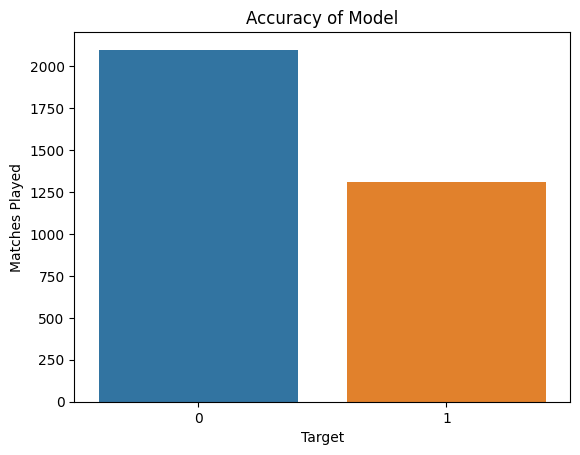

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train["target"])
plt.xlabel("Target")
plt.ylabel("Matches Played")
plt.title("Accuracy of Model")
plt.show()

In [19]:
rf.feature_importances_

array([0.05165072, 0.59036203, 0.2020455 , 0.15594175])

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test["target"], preds)

array([[614, 121],
       [248, 223]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(preds, test["target"]))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       862
           1       0.47      0.65      0.55       344

    accuracy                           0.69      1206
   macro avg       0.65      0.68      0.66      1206
weighted avg       0.73      0.69      0.71      1206



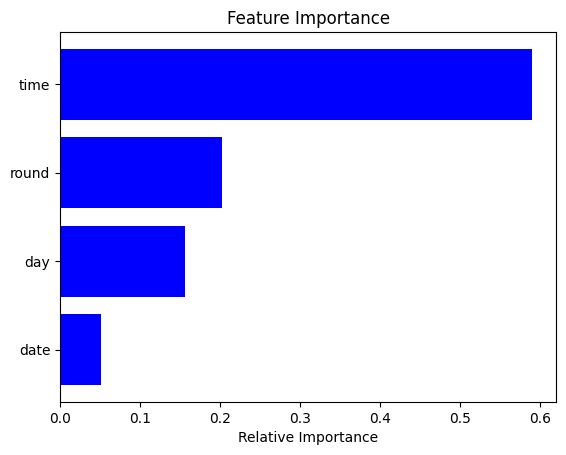

In [26]:
import numpy as np

features = matches.columns
importance = rf.feature_importances_
indices = np.argsort(importance)

plt.title("Feature Importance")
plt.barh(range(len(indices)), importance[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [31]:
from sklearn.metrics import f1_score
f1_score(test["target"], preds)

0.5472392638036809